In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


In [87]:
import warnings
warnings.filterwarnings("ignore")

In [88]:
df = load_breast_cancer()
x = df.data
y = df.target

print(df.feature_names)
print(df.target_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


In [89]:
df=pd.read_csv("data.csv")

In [90]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [92]:
df.shape

(569, 33)

In [93]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [94]:
for column in df.select_dtypes(include="object").columns: 
    print(f" {df [column].value_counts()}\n")




 diagnosis
B    357
M    212
Name: count, dtype: int64



In [95]:
print("Total no.of diagnosis are", str(df.shape[0]) , "/", df.diagnosis.value_counts()["B"],"Benign and Malignent are",
                                    df.diagnosis.value_counts()["M"])

Total no.of diagnosis are 569 / 357 Benign and Malignent are 212


In [96]:
df.duplicated().sum()

0

In [97]:
Diagnosis_cnt = df['diagnosis'].value_counts()
Diagnosis_cnt.reset_index()

,diagnosis,count
0,B,357
1,M,212


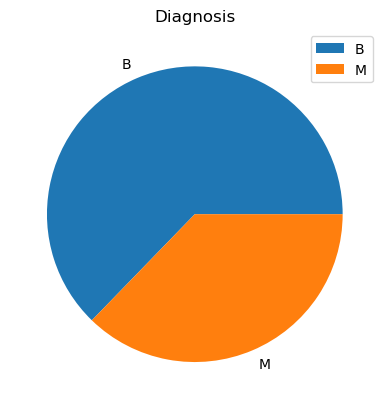

In [98]:
plt.pie(x= Diagnosis_cnt.values,labels = Diagnosis_cnt.index)
plt.title("Diagnosis")
plt.legend()
plt.show()

In [99]:
x = df.drop(columns = 'diagnosis')
y =df['diagnosis']

In [100]:
x_train , x_test , y_train , y_test  = train_test_split(x,y,test_size = 0.2)

In [101]:
print(x_train.shape , y_train.shape , x_test.shape ,y_test.shape)

(455, 32) (455,) (114, 32) (114,)


In [102]:
scale = StandardScaler() 
x = scale.fit_transform(x)

In [103]:
label = LabelEncoder()
y = label.fit_transform(y)

In [105]:
imputer = SimpleImputer(strategy = "mean")
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)

log_reg = LogisticRegression(max_iter =10000)
log_reg.fit(x_train_imputed, y_train)

LogisticRegression(max_iter=10000)

In [106]:
dec_tree_cls = DecisionTreeClassifier()
dec_tree_cls.fit(x_train_imputed, y_train)


DecisionTreeClassifier()

In [108]:
SVM = SVC()
SVM.fit(x_train_imputed,y_train)

SVC()

In [110]:
ran_for_cls = RandomForestClassifier()
ran_for_cls.fit(x_train_imputed, y_train)

RandomForestClassifier()

In [114]:
K_neg_cls = KNeighborsClassifier()
K_neg_cls.fit(x_train_imputed, y_train)

KNeighborsClassifier()

In [116]:
log_reg_y_pred = log_reg.predict(x_test_imputed)
dec_tree_cls_y_pred = dec_tree_cls.predict(x_test_imputed)
SVM_y_pred = SVM.predict(x_test_imputed)
ran_for_cls_y_pred = ran_for_cls.predict(x_test_imputed)
K_neg_cls_y_pred = K_neg_cls.predict(x_test_imputed)


In [120]:
log_reg_y_matx = confusion_matrix(y_test, log_reg_y_pred)
dec_tree_cls_y_matx = confusion_matrix(y_test, dec_tree_cls_y_pred)
SVM_y_matx = confusion_matrix(y_test, SVM_y_pred)
ran_for_cls_y_matx = confusion_matrix(y_test, ran_for_cls_y_pred)
K_neg_cls_y_matx = confusion_matrix(y_test, K_neg_cls_y_pred)

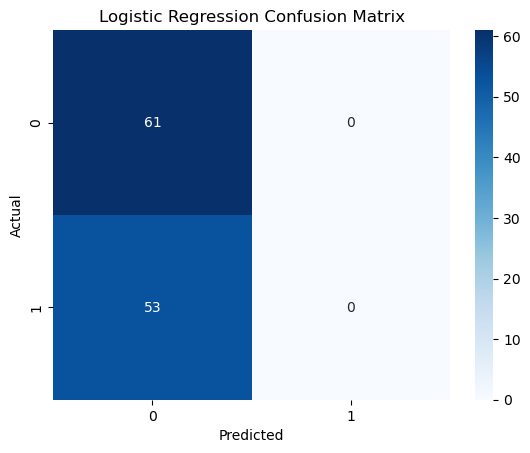

In [124]:
sns.heatmap(log_reg_y_matx, annot=True,fmt="d", cmap="Blues")

plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [126]:
report = classification_report(y_test,log_reg_y_pred, target_names=['Benign','Malignant'])
print(report)

              precision    recall  f1-score   support

      Benign       0.54      1.00      0.70        61
   Malignant       0.00      0.00      0.00        53

    accuracy                           0.54       114
   macro avg       0.27      0.50      0.35       114
weighted avg       0.29      0.54      0.37       114



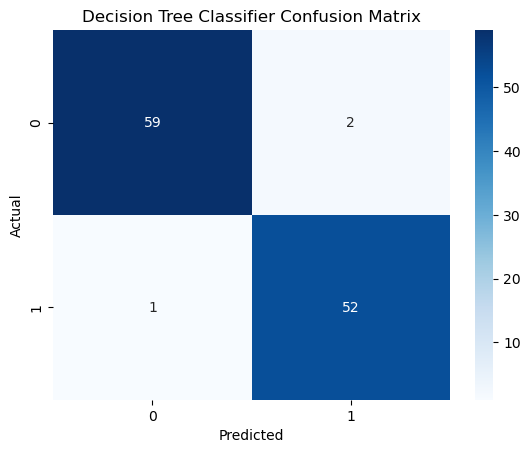

In [127]:
sns.heatmap(dec_tree_cls_y_matx, annot=True,fmt="d",cmap="Blues")

plt.title("Decision Tree Classifier Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [128]:
report = classification_report(y_test,dec_tree_cls_y_pred, target_names=['Benign','Malignant'])
print(report)

              precision    recall  f1-score   support

      Benign       0.98      0.97      0.98        61
   Malignant       0.96      0.98      0.97        53

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



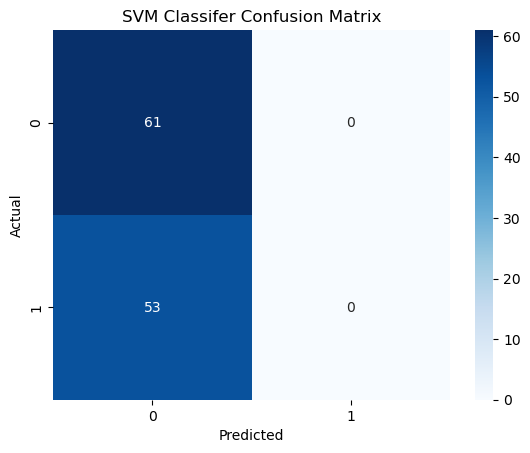

In [132]:
sns.heatmap(SVM_y_matx,annot=True,fmt="d",cmap="Blues")

plt.title("SVM Classifer Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [133]:
report = classification_report(y_test,SVM_y_pred, target_names=['Benign','Malignant'])
print(report)

              precision    recall  f1-score   support

      Benign       0.54      1.00      0.70        61
   Malignant       0.00      0.00      0.00        53

    accuracy                           0.54       114
   macro avg       0.27      0.50      0.35       114
weighted avg       0.29      0.54      0.37       114



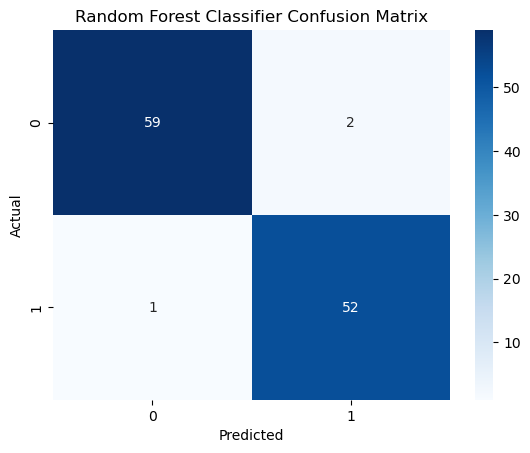

In [134]:
sns.heatmap(ran_for_cls_y_matx,annot=True,fmt="d",cmap="Blues")

plt.title("Random Forest Classifier Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [135]:
report = classification_report(y_test,ran_for_cls_y_pred, target_names=['Benign','Malignant'])
print(report)

              precision    recall  f1-score   support

      Benign       0.98      0.97      0.98        61
   Malignant       0.96      0.98      0.97        53

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



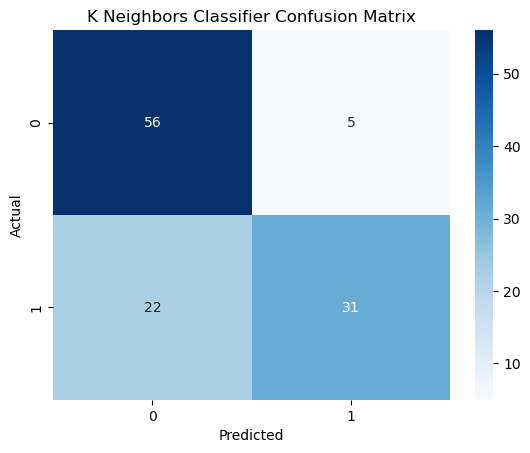

In [136]:
sns.heatmap(K_neg_cls_y_matx,annot=True,fmt="d",cmap="Blues")

plt.title("K Neighbors Classifier Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()